In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numdifftools as nd
import pandas as pd
import respy as rp
import numpy as np
from estimagic.optimization.optimize import maximize


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
params_base, options_base = rp.get_example_model("kw_2000", with_data=False)
options_base

{'estimation_draws': 200,
 'estimation_seed': 500,
 'estimation_tau': 500,
 'interpolation_points': -1,
 'n_periods': 50,
 'simulation_agents': 5000,
 'simulation_seed': 132,
 'solution_draws': 500,
 'solution_seed': 456,
 'core_state_space_filters': ["period > 0 and exp_{i} == period and lagged_choice_1 != '{i}'",
  "period > 0 and exp_white_collar + exp_blue_collar + exp_military + exp_school == period and lagged_choice_1 == '{j}'",
  "period > 0 and lagged_choice_1 == 'school' and exp_school == 0",
  "lagged_choice_1 == '{k}' and exp_{k} == 0",
  "period == 0 and lagged_choice_1 == '{k}'"],
 'covariates': {'not_exp_white_collar_lagged': "exp_white_collar > 0 and lagged_choice_1 != 'white_collar'",
  'not_exp_blue_collar_lagged': "exp_blue_collar > 0 and lagged_choice_1 != 'blue_collar'",
  'work_white_collar_lagged': "lagged_choice_1 == 'white_collar'",
  'work_blue_collar_lagged': "lagged_choice_1 == 'blue_collar'",
  'school_lagged': "lagged_choice_1 == 'school'",
  'not_any_exp_w

In [51]:
crit_func = rp.get_crit_func(params_base, options_base, df)

params_start = params_base.copy()
params_start.loc[("shocks_sdcorr", "sd_hammock"), "value"] = -0.5

results, params_rslt = maximize(
                    crit_func, params_start, 
                    "nlopt_bobyqa", 
                    algo_options={"maxeval": 10}, 
                    constraints=constr_base, 
        )

In [ ]:
results, params_rslt

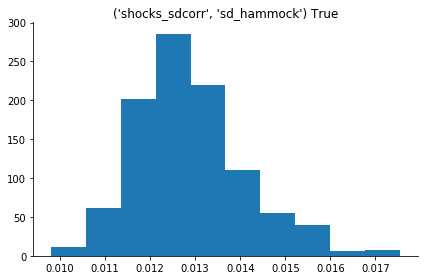

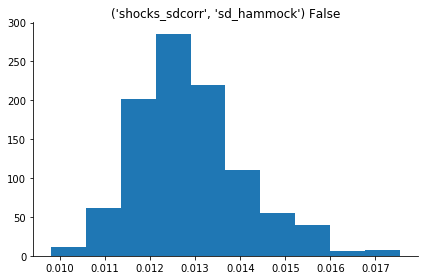

In [23]:
for i, index in enumerate([("shocks_sdcorr", "sd_hammock")]):
    
    for is_perturb in [True, False]:

        fname = f"bootstrap.{index[1]}_perturb_{str(is_perturb).lower()}.pkl"
        boot_params = pd.read_pickle(fname)

        fig, ax = plt.subplots()

        ax.hist(boot_params.loc[index, :])
        ax.set_title(f"{index} {is_perturb}")

        plt.show()

In [25]:
boot_params.loc[("shocks_sdcorr", "sd_hammock")].mean()

0.012890647124466774